# Câu 1:
---

In [4]:
import math
def euclidean_distance(x, y):
    #Code here
    distance = 0
    for i in range(len(x)):

        distance += (x[i] - y[i]) ** 2
    return math.sqrt(distance)

x = [1, 2, 3]
y = [4, 5, 6]
print((euclidean_distance(x, y)))

5.196152422706632


kq: 5.19

# Câu 2: a
---

In [21]:
from sklearn.datasets import load_iris
from cvxopt import matrix, solvers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [22]:
#Load data
iris = load_iris()
X = iris.data[:200, :2]  # Sử dụng 2 features đầu và 200 mẫu đầu tiên
y = iris.target[:200]
y = np.where(y == 0, -1, 1)  # Chuyển nhãn thành {-1, 1}

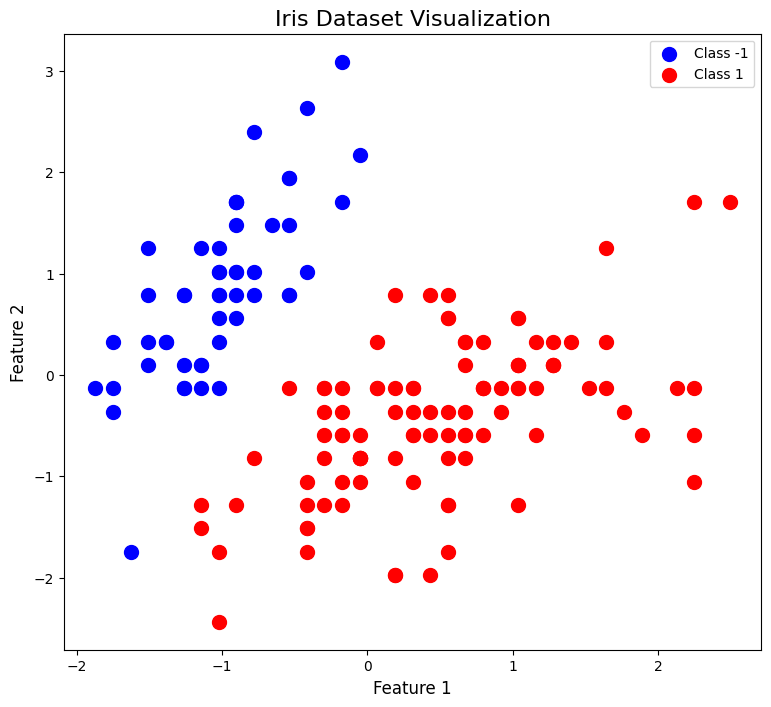

In [48]:
# Trực quan hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

plt.figure(figsize=(9, 8))

plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Class -1', marker='o', s=100)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', marker='o', s=100)



plt.title('Iris Dataset Visualization', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.show()
# Code here 


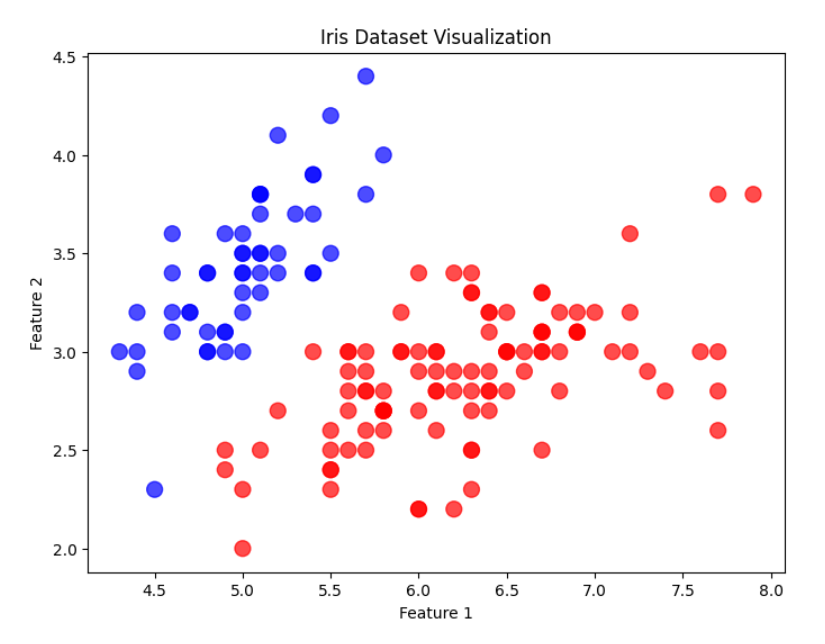

# Câu 2: b
---

In [66]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from cvxopt import matrix, solvers
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]
y = np.where(y == 0, -1, 1)


In [67]:
# Chuẩn hóa dữ liệu:
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X = (X - mean) / std_dev

     pcost       dcost       gap    pres   dres
 0: -1.6775e+01 -3.4856e+01  3e+02  2e+01  2e+00
 1: -3.0085e+01 -2.7482e+01  1e+02  7e+00  8e-01
 2: -5.0039e+01 -3.5165e+01  1e+02  5e+00  5e-01
 3: -2.5704e+01 -1.5559e+01  3e+01  1e+00  1e-01
 4: -1.0522e+01 -1.1750e+01  1e+00  5e-15  4e-15
 5: -1.1260e+01 -1.1279e+01  2e-02  3e-15  3e-15
 6: -1.1273e+01 -1.1273e+01  2e-04  6e-15  3e-15
 7: -1.1273e+01 -1.1273e+01  2e-06  1e-15  3e-15
 8: -1.1273e+01 -1.1273e+01  2e-08  4e-15  3e-15
 9: -1.1273e+01 -1.1273e+01  2e-10  3e-15  3e-15
Optimal solution found.

Lambda = [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 6.585 0.    0.    0.    0.    4.689 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    1.973 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0

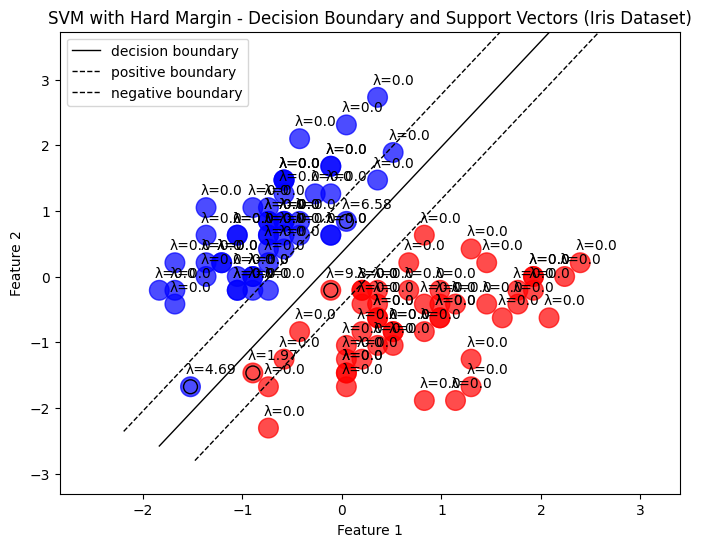


Margin = 0.4212


In [75]:
# ---- Compute lambda using cvxopt ----

# Compute the H matrix for the optimization problem
n_samples, n_features = X.shape
H = np.outer(y, y) * np.dot(X, X.T) # H = y_i * y_j * x_i * x_j.T
P = matrix(H)
q = matrix(-np.ones(n_samples))
G = matrix(np.diag(-np.ones(n_samples)))
h = matrix(np.zeros(n_samples))
A = matrix(y, (1, n_samples), 'd')
b = matrix(0.0)

# Set solver parameters
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-10
solvers.options['feastol'] = 1e-10

# Solve QP
solution = solvers.qp(P, q, G, h, A, b)
lamb = np.array(solution['x'])  # lambda

# ---- Compute w and b ----

# Weight vector w
w = np.sum(lamb * y[:, np.newaxis] * X, axis=0)

# Identify support vectors
support_vector_indices = np.where(lamb > 1e-5)[0]
support_vectors = X[support_vector_indices]
support_vector_labels = y[support_vector_indices]
support_vector_lambdas = lamb[support_vector_indices]

# Bias b
b = np.mean(support_vector_labels - np.dot(support_vectors, w))

# Print results
print('\nLambda =', np.round(lamb.flatten(), 3))
print('w =', np.round(w, 3))
print('b =', np.round(b, 3))

# ---- Visualization ----

plt.figure(figsize=(8, 6))
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], s=200, c=colors, alpha=0.7)

# Plot decision boundary
x1_dec = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
x2_dec = -(w[0] * x1_dec + b) / w[1]
plt.plot(x1_dec, x2_dec, 'k-', lw=1.0, label='decision boundary')

# Plot positive and negative margins
w_norm = np.sqrt(np.sum(w ** 2))
w_unit = w / w_norm
half_margin = 1 / w_norm
# upper = np.array([x1_dec, x2_dec + half_margin]).T
# lower = np.array([x1_dec, x2_dec - half_margin]).T
upper = np.vstack([x1_dec, x2_dec]).T + (half_margin * w_unit) * 2
lower = np.vstack([x1_dec, x2_dec]).T - (half_margin * w_unit) * 2

plt.plot(upper[:, 0], upper[:, 1], 'k--', lw=1.0, label='positive boundary')
plt.plot(lower[:, 0], lower[:, 1], 'k--', lw=1.0, label='negative boundary')


# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, marker='o', facecolors='none', edgecolors='k')

# Annotate lambda for each data point
for s, (x1, x2) in zip(lamb, X):
    plt.annotate('λ=' + str(s[0].round(2)), ((x1 - 0.05), (x2 + 0.2)))

plt.legend()
plt.title("SVM with Hard Margin - Decision Boundary and Support Vectors (Iris Dataset)")
plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("\nMargin = {:.4f}".format(2 * half_margin))

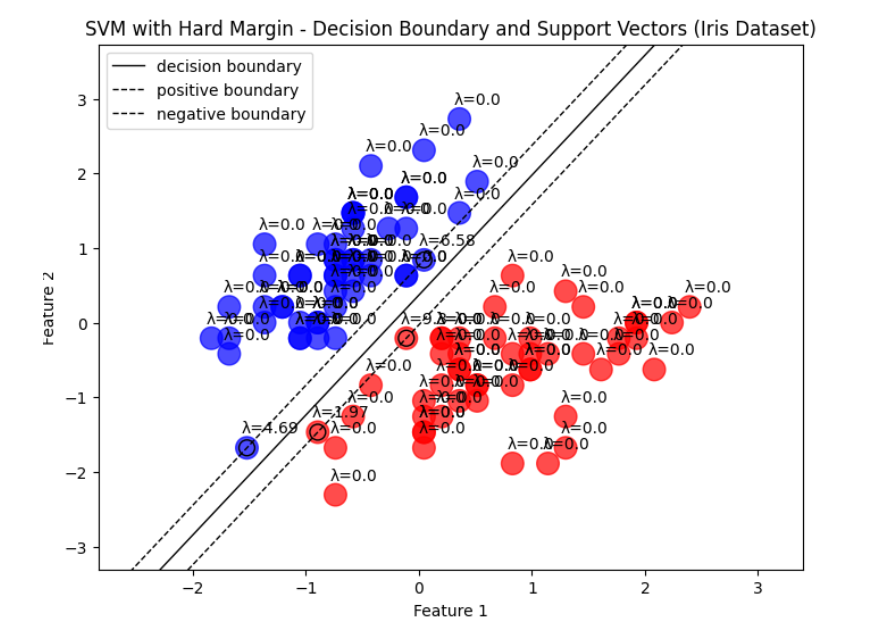

# Câu 3:
---

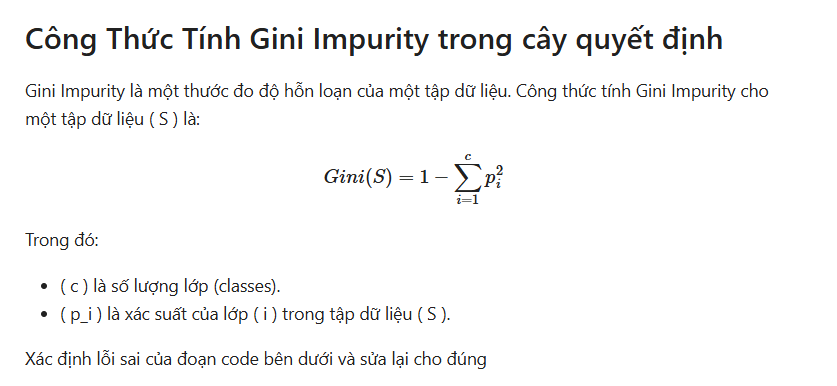

# Trả lời câu hỏi ở trên

Có tất cả 3 lỗi trong đoạn code:

+ Ở công thức "probabilities = counts / len(Y)" bị ở chỗ "Y" ghi hoa sửa lại "probabilities = counts / len(y)"

+ Ở unique_classes, counts = np.unique(y, return_counts=False) khi return bị đẩy sang False thì không thể cho giá trọ lặp lại được sửa lại "unique_classes, counts = np.unique(y, return_counts=True)"

+ Ở phần công thức chính return 1 - np.sum(probabilities) bị thiếu ở  probabilities chưa được bình phương lên sửa lại là "return 1 - np.sum(probabilities ** 2)"

In [18]:

# Đọc đoạn code này
import numpy as np

def gini_impurity(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)


y = np.array([0, 1, 0, 1, 1, 0, 0, 1])
gini = gini_impurity(y)
print("Gini Impurity của tập dữ liệu là:", gini)

Gini Impurity của tập dữ liệu là: 0.5
